In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#we need our plots to appear inside a cell (notebook)

#models from from Scikit-Learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Notebook Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("./6.1 heart-disease.csv")
df.shape

(303, 14)

#### Data dictionary
1. age: Age in years.
2. sex: Sex (1 = male; 0 = female).
3. cp: Chest pain type.
4. trestbps: Resting blood pressure (in mm Hg).
5. chol: Serum cholesterol in mg/dl.
6. fbs: Fasting blood sugar > 120 mg/dl.
7. restecg: Resting electrocardiographic results.
8. thalach: Maximum heart rate achieved.
9. exang: Exercise induced angina.
10. oldpeak: ST depression induced by exercise relative to rest.
11. slope: The slope of the peak exercise ST segment.
12. ca: Number of major vessels (0-3) colored by fluoroscopy.
13. thal: Thalassemia.
14. target (num in original data): Diagnosis of heart disease (angiographic disease status), where 0 indicates no disease and 1 indicates disease present

#### Data Exploration

1. what questions are you trying to solve?
2. what kind of data do we have?
3. whats missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how do you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

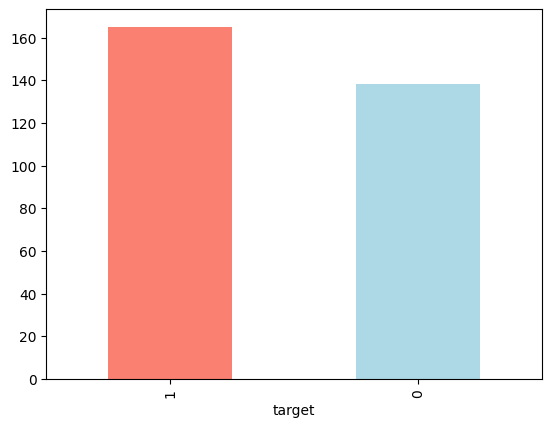

In [5]:
df["target"].value_counts().plot(kind = "bar" , color = ["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


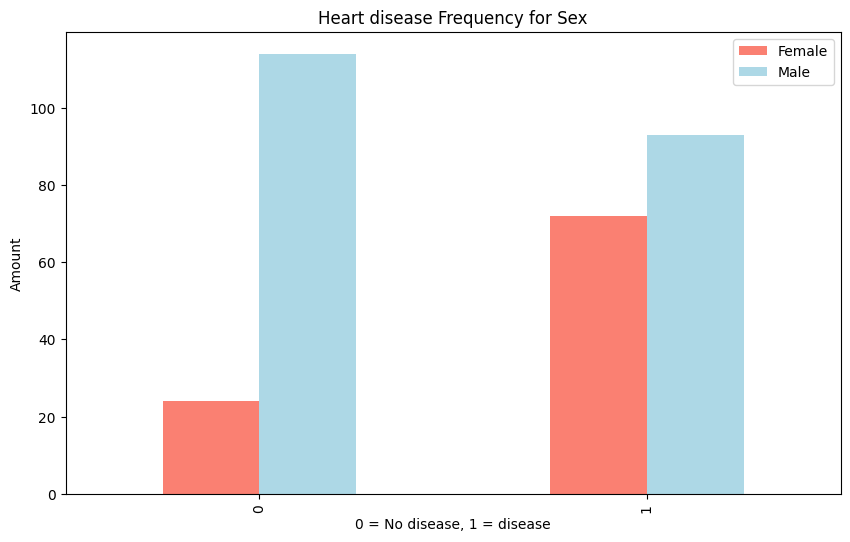

In [11]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize=(10, 6), color = ["salmon", "lightblue"])
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 90);

#### age vs max heart rate for heart disease

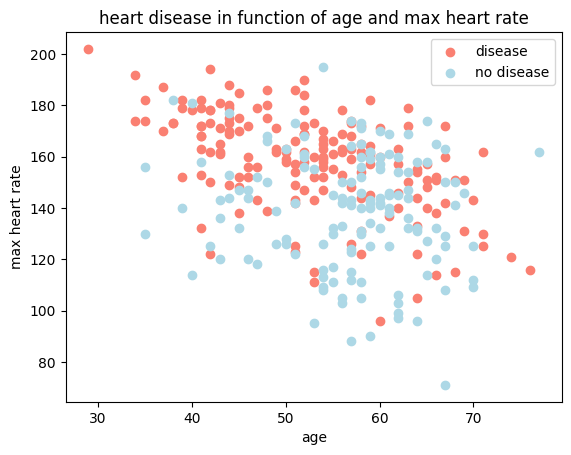

In [12]:
plt.Figure(figsize=(10, 6))
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon");
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue");
# Add some info 
plt.title("heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"]);

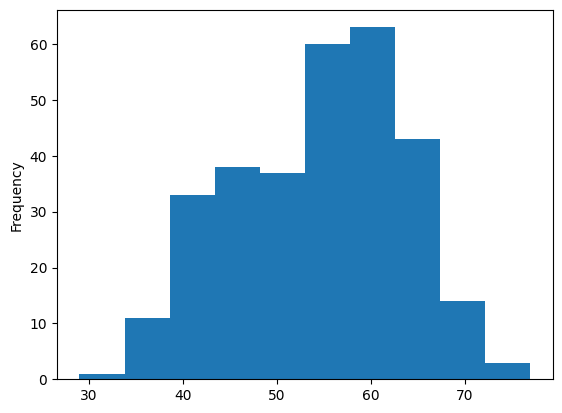

In [13]:
df.age.plot.hist();

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


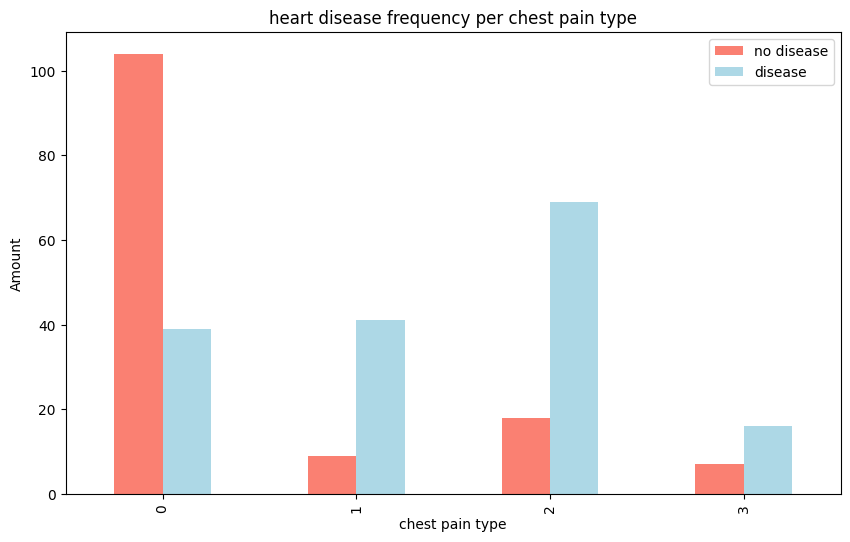

In [15]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize=(10,6),
                                   color = ["salmon", "lightblue"])
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["no disease", "disease"]);

In [16]:
#make correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


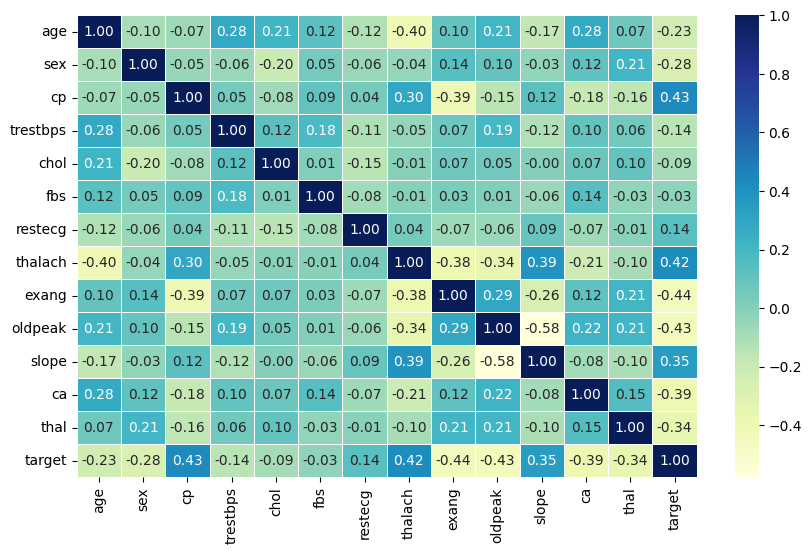

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");

In [18]:
df["exang"].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [19]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


#### Modeling 

In [20]:
X = df.drop("target", axis = 1)
y = df["target"]

In [23]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=(0.2))

In [22]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates the given machine leaning models.
    models: a sict of dfferent scikit-Learn Machine leaning models
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


In [28]:
model_scores = fit_and_score(models=models,
                             x_test=x_test,
                             x_train=x_train,
                             y_test=y_test,
                             y_train = y_train)

/home/mike/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

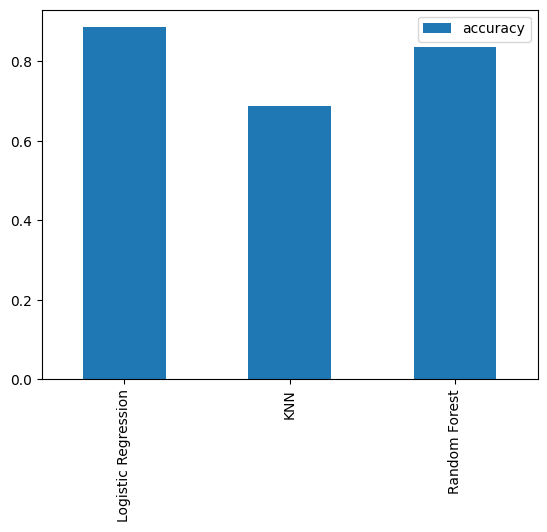

In [32]:
model_comparision = pd.DataFrame(model_scores, index = ["accuracy"])
model_comparision.T.plot.bar();

now we got a baseline model and weknow a models first predictions aren't always what we should based our next steps off what should we do?

lets look at the following:
* Hyperparameter tunning
* feature importance 
* confusion matrix
* cross-validation
* precision
* recall
* f1 score
* classification report 
* ROC curve
* Area Under The curve(AUC)
#### Hyperparameter tunning

In [37]:
train_scores = []
test_scores = []

neighbours = range(1,21)
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

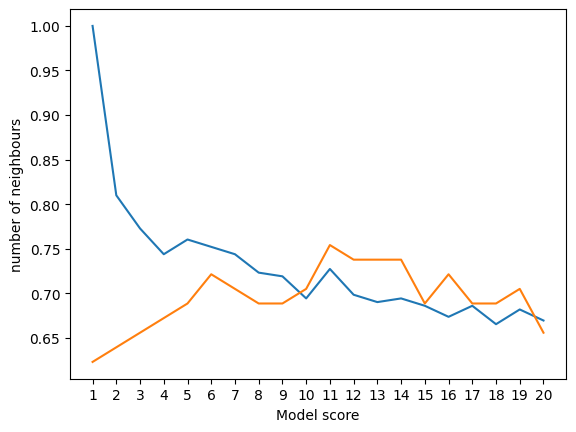

In [47]:
plt.plot(neighbours, train_scores, label = "Train scores")
plt.plot(neighbours, test_scores, label = "Test scores")
plt.xlabel("Model score")
plt.ylabel("number of neighbours")
plt.xticks(np.arange(1,21,1));